In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import os
df=pd.read_csv("/kaggle/input/machinelearning/Churn_Modelling.txt")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [14]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [16]:
only_female=df[df['Gender']=='Female']
only_female.value_counts

<bound method DataFrame.value_counts of       RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Hargrave          619    France  Female   42   
1             2    15647311         Hill          608     Spain  Female   41   
2             3    15619304         Onio          502    France  Female   42   
3             4    15701354         Boni          699    France  Female   39   
4             5    15737888     Mitchell          850     Spain  Female   43   
...         ...         ...          ...          ...       ...     ...  ...   
9982       9983    15768163      Griffin          655   Germany  Female   46   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9994       9995    15719294         Wood          800    France  Female   29   
9997       9998    15584532          Liu          709    France  Female   36   
9999      10000    15628319       Walker          792    France  Female   28   


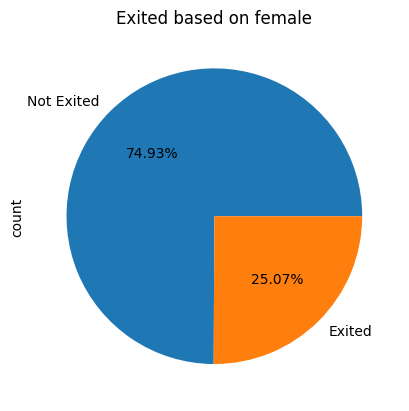

In [18]:
only_female=df[df['Gender']=='Female']
female_exits =only_female['Exited'].value_counts()
labels =['Not Exited','Exited']
female_exits.plot(kind='pie',autopct='%.2f%%',labels=labels,title='Exited based on female')
plt.show()

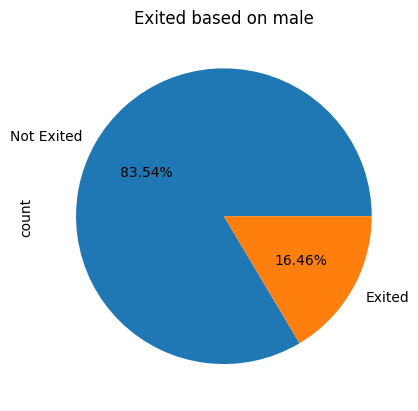

In [19]:
only_male=df[df['Gender']=='Male']
male_exits =only_male['Exited'].value_counts()
labels =['Not Exited','Exited']
male_exits.plot(kind='pie',autopct='%.2f%%',labels=labels,title='Exited based on male')
plt.show()

Text(0, 0.5, 'No.of customers coming in the restaurant')

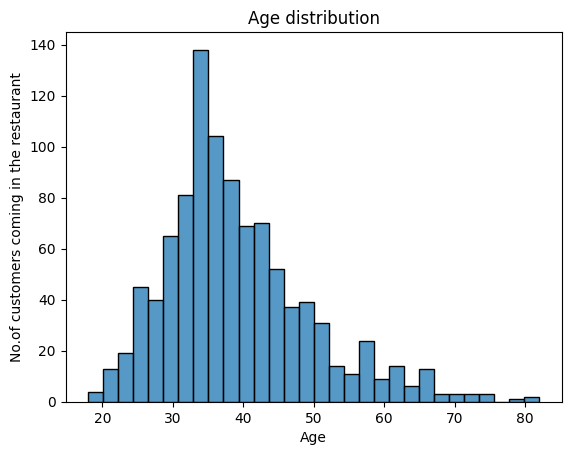

In [20]:
sns.histplot(df['Age'].head(1000),bins=30)
plt.title("Age distribution")
plt.ylabel("No.of customers coming in the restaurant")

Text(0.5, 1.0, 'Products purchased')

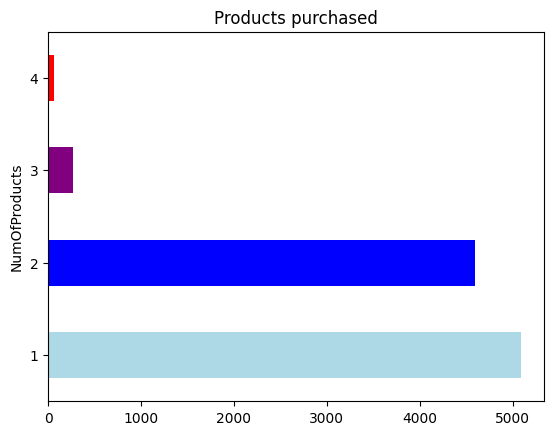

In [24]:
noofproducts=df["NumOfProducts"].value_counts()
color=['lightblue','blue','purple','red']
noofproducts.plot(kind='barh',color=color)
plt.title("Products purchased")


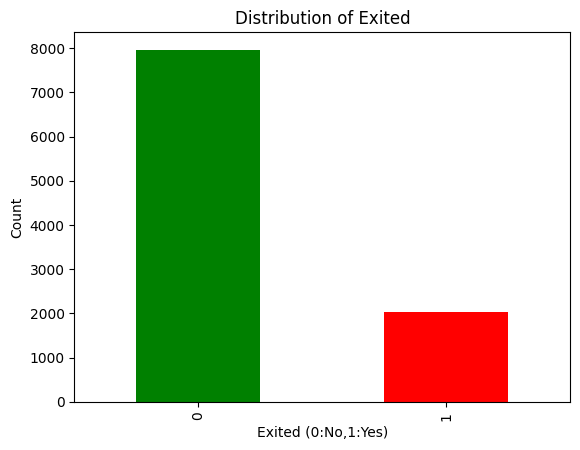

In [25]:
exit=df['Exited'].value_counts()
exit.plot(kind='bar',color=['green','red'])
plt.title('Distribution of Exited')
plt.xlabel('Exited (0:No,1:Yes)')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, ' ')

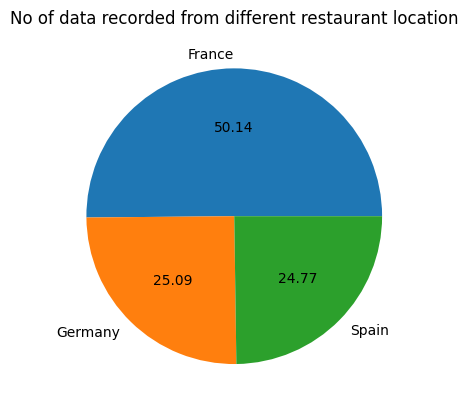

In [27]:
df['Geography'].value_counts().plot(kind="pie",autopct='%.2f',title="No of data recorded from different restaurant location")
plt.ylabel(" ")

In [28]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [29]:
df.drop(columns=['RowNumber','CustomerId'],inplace=True)

In [31]:
df=pd.get_dummies(df, columns=['Gender','Geography'])
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,True,False,False
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,True,False,False,False,True
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,True,False,False
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,True,False,False
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,True,True,False,False
9996,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,True,True,False,False
9997,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,True,False,False
9998,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False,True,False


In [32]:
df.drop(columns=['Gender_Male','Geography_France'],inplace=True)
df

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Geography_Germany,Geography_Spain
0,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,Hill,608,41,1,83807.86,1,0,1,112542.58,0,True,False,True
2,Onio,502,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,Boni,699,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,False,False,False
9996,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,False,False,False
9997,Liu,709,36,7,0.00,1,0,1,42085.58,1,True,False,False
9998,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,False,True,False


In [35]:
df['Gender_Female']=df['Gender_Female'].astype(int)
df['Geography_Spain']=df['Geography_Spain'].astype(int)
df['Geography_Germany']=df['Geography_Germany'].astype(int)
df1=df.drop(columns=["Surname"])

In [36]:
X=df1.drop('Exited',axis=1)
y=df1['Exited']
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_Female,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,1,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0


In [37]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size=0.2,random_state=42)


In [39]:
print(X_test)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
6252          596   32       3   96709.07              2          0   
4684          623   43       1       0.00              2          1   
1731          601   44       4       0.00              2          1   
4742          506   59       8  119152.10              2          1   
4521          560   27       7  124995.98              1          1   
...           ...  ...     ...        ...            ...        ...   
6412          602   53       5   98268.84              1          0   
8285          609   25      10       0.00              1          0   
7853          730   47       7       0.00              1          1   
1095          692   29       4       0.00              1          1   
6929          628   39       1  115341.19              1          1   

      IsActiveMember  EstimatedSalary  Gender_Female  Geography_Germany  \
6252               0         41788.37              0                  1 

In [40]:
print(X_train)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9254          686   32       6       0.00              2          1   
1561          632   42       4  119624.60              2          1   
1670          559   24       3  114739.92              1          1   
6087          561   27       9  135637.00              1          1   
6669          517   56       9  142147.32              1          0   
...           ...  ...     ...        ...            ...        ...   
5734          768   54       8   69712.74              1          1   
5191          682   58       1       0.00              1          1   
5390          735   38       1       0.00              3          0   
860           667   43       8  190227.46              1          1   
7270          697   51       1  147910.30              1          1   

      IsActiveMember  EstimatedSalary  Gender_Female  Geography_Germany  \
9254               1        179093.26              0                  0 

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Gender_Female      10000 non-null  int64  
 10  Geography_Germany  10000 non-null  int64  
 11  Geography_Spain    10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
#normalistion
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler()
X_train = sc.fit_transform(X_train)

In [59]:
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
import pickle

In [54]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
pred_1r = lr_classifier.predict (X_test)
lr_classifier.score(X_test,y_test)

0.7825

Mean Squared Error: 0.666693169174195
R-squared: -3.2225769204652988


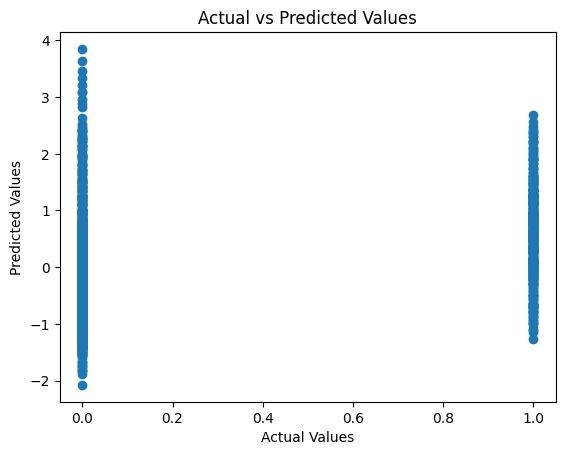

In [69]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


model1 = LinearRegression()  
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
mse = mean_squared_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
plt.scatter(y_test, y_pred1)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


Mean Squared Error: 0.505
R-squared: -2.1984748658461473


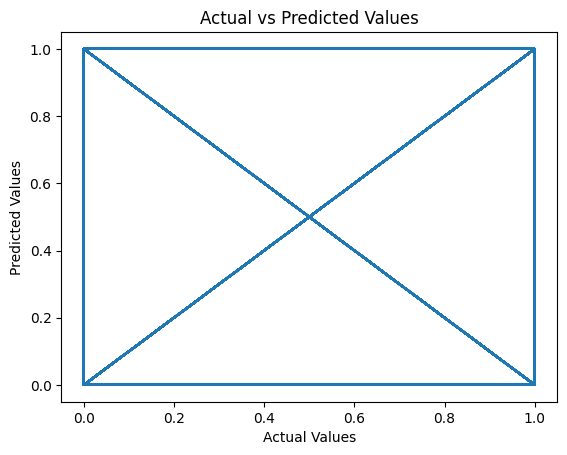

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
mse_1 = mean_squared_error(y_test, y_pred2)
r2_1 = r2_score(y_test, y_pred2)
print(f'Mean Squared Error: {mse_1}')
print(f'R-squared: {r2_1}')
plt.plot(y_test, y_pred2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

Mean Squared Error (Lasso): 0.15796874999999996
R-squared (Lasso): -0.0005130227012544175


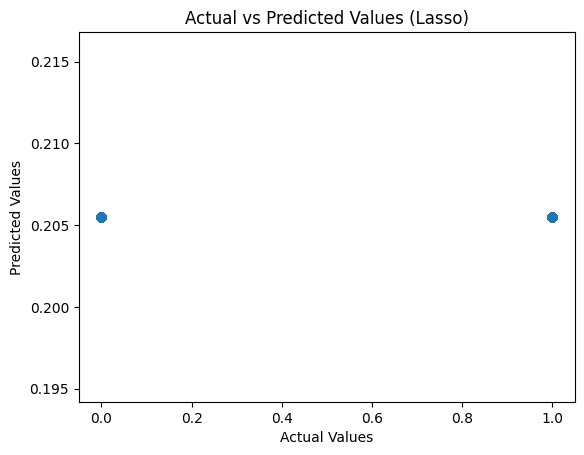

In [74]:
from sklearn.linear_model import Lasso

model3 = Lasso()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred3)
r2_2 = r2_score(y_test, y_pred3)

print(f'Mean Squared Error (Lasso): {mse_2}')
print(f'R-squared (Lasso): {r2_2}')
plt.scatter(y_test, y_pred3)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Lasso)')
plt.show()


Mean Squared Error (SVR): 0.5758571539976196
R-squared (SVR): -2.6472566997605558


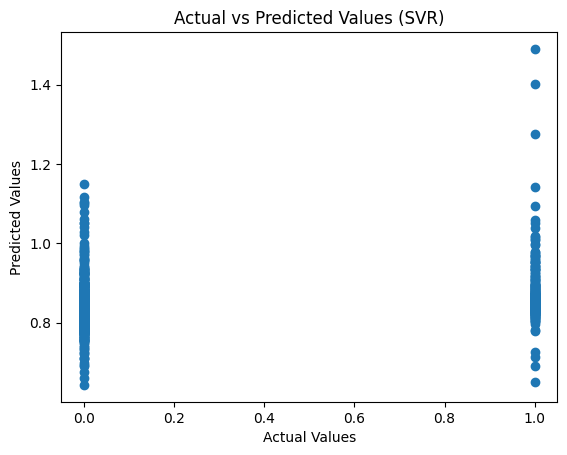

In [75]:
from sklearn.svm import SVR

model4 = SVR()
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)

mse_3 = mean_squared_error(y_test, y_pred4)
r2_3 = r2_score(y_test, y_pred4)

print(f'Mean Squared Error (SVR): {mse_3}')
print(f'R-squared (SVR): {r2_3}')
plt.scatter(y_test, y_pred4)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (SVR)')
plt.show()
